In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
df=pd.read_excel("/content/Dataset.xlsx")  # Median house prices for California districts derived from the 1990 census.


In [ ]:
df.head()    # Showing first five rows

# 1. longitude: A measure of how far east a house is; a higher value is farther east (-ve value for west direction)
# 2. latitude: A measure of how far north a house is; a higher value is farther north
# 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
# 4. totalRooms: Total number of rooms within a block
# 5. totalBedrooms: Total number of bedrooms within a block
# 6. population: Total number of people residing within a block
# 7. households: Total number of households, a group of people residing within a home unit, for a block
# 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
# 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
# 10. oceanProximity: Location of the house w.r.t ocean/sea



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape   # To find the number of rows and number of columns

(20640, 10)

**1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.**



The average of median income is: 3.8706710029069766


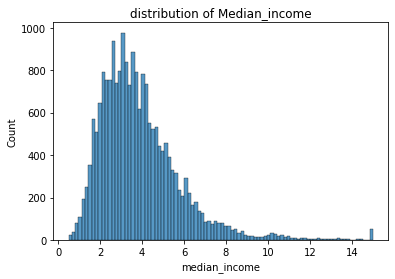

In [ ]:
avg_median_income=df["median_income"].mean()   # Finding the mean of the "median_income" column
print("The average of median income is:",avg_median_income)
sns.histplot(df["median_income"])     # Plotting Histogram of "median_income" column for understanding the distribution
plt.title("distribution of Median_income")   # Giving a Title to the graph
plt.show()

We can see the distribution is Right skewed normally distributed. So magority of the people follow normal distribution. But there are some people who are having very high salary.

**2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.**


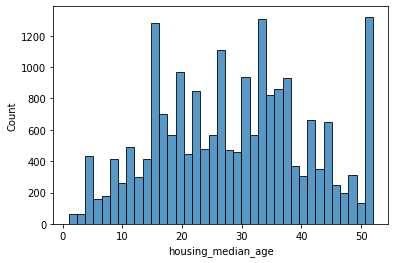

In [ ]:
sns.histplot(df["housing_median_age"])  # Plotting Histogram of "housing_median_age" column for understanding the distribution
plt.show()


Here the distribution is not so good. We can see here that there are three tall bars. So in those three years the construction of houses were highest.

**3. Show with the help of visualization, how median_income and median_house_values are related?**



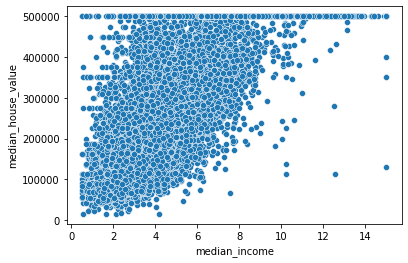

In [ ]:
sns.scatterplot(x="median_income",y="median_house_value",data=df) # Plotting scatter plot to see the relation between "median_income" and "median_house_value"
plt.show()

If the salary of a person is high then the probability of buying an expensive house is higher. That is what this graph is showing. median_income and median_house_value are positively correlated having correlation coefficient 0.69.

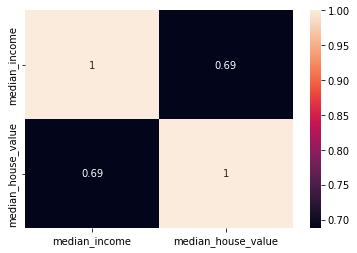

In [ ]:
sns.heatmap(df[["median_income","median_house_value"]].corr(),annot=True) # Plotting heat map to see the correlation coefficient between the two columns
plt.show()

**4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.**



In [ ]:
df["total_bedrooms"].isnull().sum()  # showing how many null values are present in the "total_bedrooms" column

207

In [ ]:
df_dropped_bedrooms=df.dropna(subset=["total_bedrooms"])  #creating a new dataset by dropping the whole rows where the null value is present
df_dropped_bedrooms  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.**



In [ ]:
bedroom_mean=df["total_bedrooms"].mean()   # finding out the mean value of the "total_bedrooms" column
bedroom_mean

537.8705525375618

In [ ]:
df_filled_bedrooms=df.fillna(bedroom_mean)   # filling the null values with the mean of that column
df_filled_bedrooms


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df_filled_bedrooms.isna().sum()  # seeing if there are any null value present in the dataset 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**6. Write a programming construct (create a user defined function) to calculate 
the median value of the data set wherever required.**



In [ ]:
def finding_median(col_name):    # creating a function which returns the median of the column we want
  return col_name.median()

In [ ]:
finding_median(df['median_income'])


3.5347999999999997

In [ ]:
df.iloc[:,:9].apply(finding_median)

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

**7. Plot latitude versus longitude and explain your observations.**



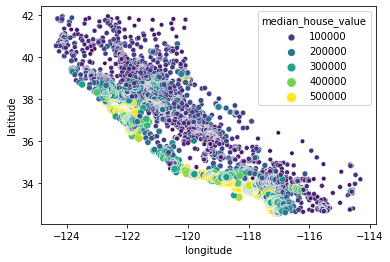

In [ ]:
sns.scatterplot(x=df["longitude"],y=df["latitude"],size=df["median_house_value"],hue=df["median_house_value"],palette="viridis")  # plotting scatter plot for latitude vs longitude
plt.show()

This graph is nothing but the graph of California itself. we can see there are two areas near the coastal region where theh median_house_value is highest. In these two areas the big cities of California like San Diago, San Jose, San Fransisco , Los Angeles are located. In these expensive cities the house price are high compared to the other cities of California.

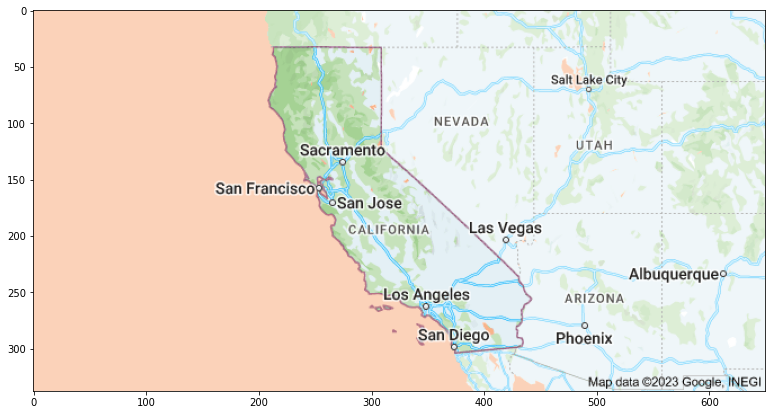

In [ ]:
img= cv2.imread('/content/california map.png')   # reading the image of map of California
fig = plt.figure(figsize=(15,7))    # setting the figure size
plt.imshow(img)     # showing the image


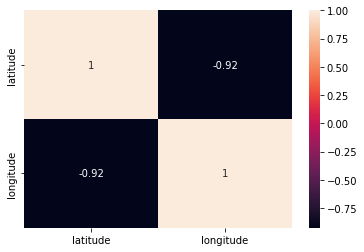

In [ ]:
sns.heatmap(df[["latitude","longitude"]].corr(), annot=True) # Plotting heat map to see the correlation coefficient between the two columns
plt.show()

**8. Create a data set for which the ocean_proximity is ‘Near ocean’.**



In [ ]:
df.groupby('ocean_proximity').size()  # seeing how many groups are there in the "ocean_proximity" column

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [ ]:
df_near_ocean=df[df["ocean_proximity"]=="NEAR OCEAN"]  # creating a new dataset by filtering the dataset based on "NEAR OCEAN"
df_near_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,NEAR OCEAN
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN
20423,-119.00,34.08,17.0,1822.0,438.0,578.0,291.0,5.4346,428600.0,NEAR OCEAN
20424,-118.75,34.18,4.0,16704.0,2704.0,6187.0,2207.0,6.6122,357600.0,NEAR OCEAN


**9. Find the mean and median of the median income for the data set created in question 8.**



In [ ]:
mean_of_income_near_ocean=df_near_ocean["median_income"].mean()
median_of_income_near_ocean=df_near_ocean["median_income"].median()
print("the mean value of the median income where ocean proximity is near ocean is :",mean_of_income_near_ocean)
print("the median value of the median income where ocean proximity is near ocean is :",median_of_income_near_ocean)

the mean value of the median income where ocean proximity is near ocean is : 4.0057848006019565
the median value of the median income where ocean proximity is near ocean is : 3.64705


Here the mean value is higher than the median. This is because the distribution of median_income is right skewed normally distributed.

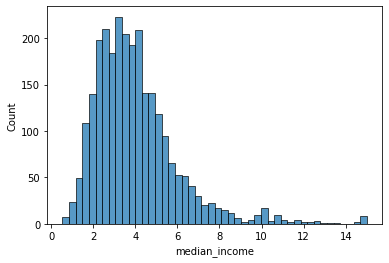

In [ ]:
sns.histplot(df_near_ocean["median_income"])   # to check why the median is less than the mean
plt.show()

**10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.**



In [ ]:
# np.where(condition, value if condition is true, value if condition is false)

In [ ]:
df['total_bedroom_size']=np.where(df["total_bedrooms"]<1000,np.where(df["total_bedrooms"]<=10,"Small","Medium"),"Large")  # creating a new column based on the required conditions
df.head()     # showing the first five records after adding the new column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Medium
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Large
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Medium
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Medium
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Medium


In [ ]:
df.groupby("total_bedroom_size").size()   # grouping by the "total_bedroom_size" column

total_bedroom_size
Large      2090
Medium    18495
Small        55
dtype: int64

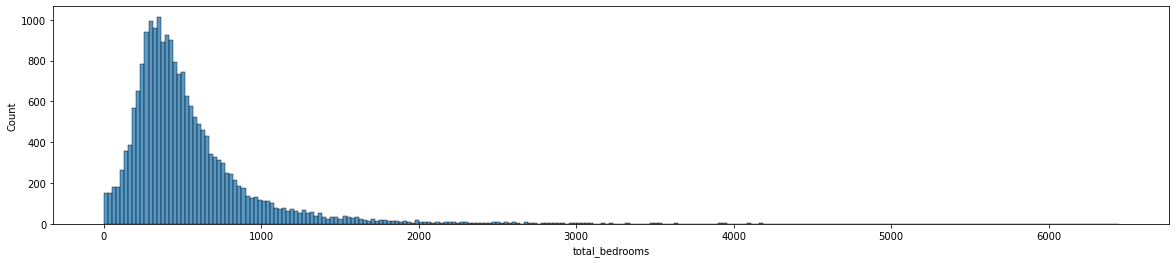

In [ ]:
plt.figure(figsize=(20,4))
sns.histplot(df["total_bedrooms"])
plt.show()